<a href="https://colab.research.google.com/github/romenmeitei/Dengue-cases-in-Manipur/blob/main/Dengue_hotspot_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         District  Total Cases  Total Cases Scaled  Cluster
0       Bishnupur        207.0           -0.197264        0
1         Chandel         27.0           -0.405138        0
2   Churachandpur        141.0           -0.273484        0
3     Imphal East       1176.0            0.921792        2
4     Imphal West       3549.0            3.662266        1
5         Jiribam          1.0           -0.435164        0
6        Kakching         97.0           -0.324298        0
7         Kamjong          8.0           -0.427080        0
8       Kangpokpi         68.0           -0.357789        0
9           Noney         25.0           -0.407448        0
10       Pherzawl          1.0           -0.435164        0
11       Senapati         55.0           -0.372802        0
12     Tamenglong         12.0           -0.422461        0
13     Tengnoupal        386.0            0.009455        0
14        Thoubal        267.0           -0.127973        0
15         Ukhrul         25.0          

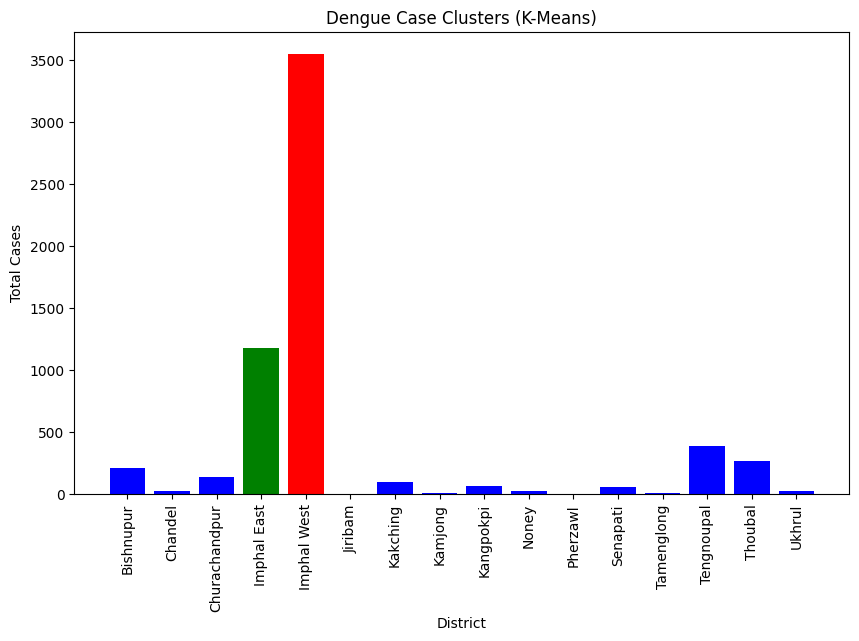

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Dengue Dataset
dengue_df = pd.read_csv("/content/Final Dataset.csv")

# Aggregate total cases by district
district_cases = dengue_df.groupby("District")[["Total Cases"]].sum().reset_index()

# Normalize the case numbers
scaler = StandardScaler()
district_cases["Total Cases Scaled"] = scaler.fit_transform(district_cases[["Total Cases"]])

# Apply K-Means clustering (Assume 3 clusters: Low, Medium, High outbreak)
kmeans = KMeans(n_clusters=3, random_state=42)
district_cases["Cluster"] = kmeans.fit_predict(district_cases[["Total Cases Scaled"]])

# Print cluster results
print(district_cases)

# Plot Clusters
plt.figure(figsize=(10, 6))
plt.bar(district_cases["District"], district_cases["Total Cases"], color=district_cases["Cluster"].map({0: "blue", 1: "red", 2: "green"}))
plt.xlabel("District")
plt.ylabel("Total Cases")
plt.title("Dengue Case Clusters (K-Means)")
plt.xticks(rotation=90)
plt.show()


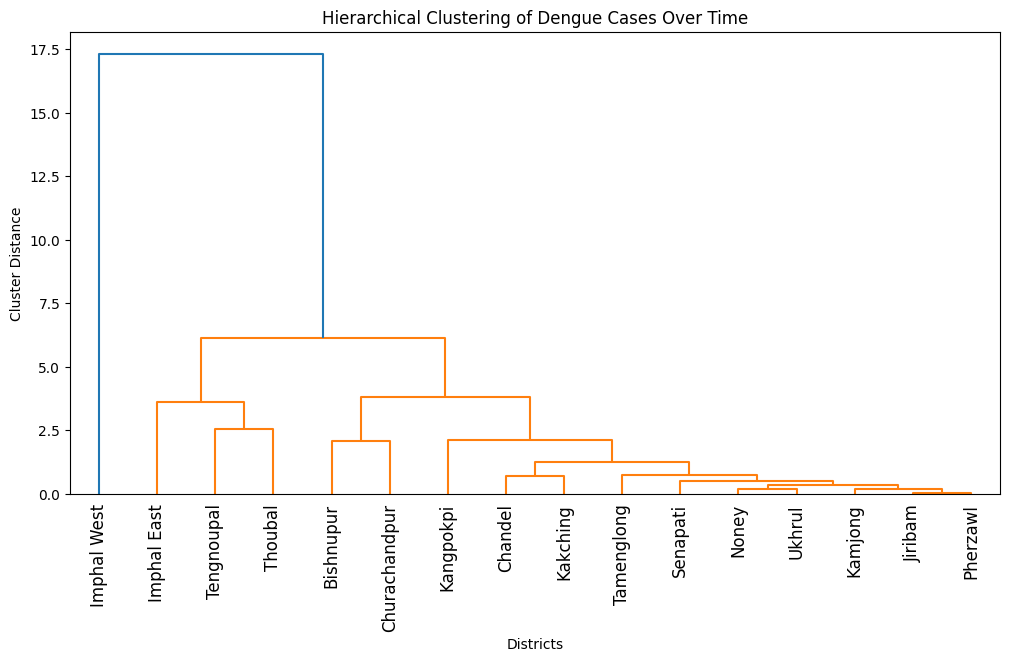

In [ ]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Load Dengue Dataset
dengue_df = pd.read_csv("/content/Final Dataset.csv")

# Pivot table: Rows = Districts, Columns = Months, Values = Total Cases
dengue_pivot = dengue_df.pivot_table(index="District", columns="Months", values="Total Cases", aggfunc="sum").fillna(0)

# Normalize the data
scaler = StandardScaler()
dengue_scaled = scaler.fit_transform(dengue_pivot)

# Apply Hierarchical Clustering
linked = linkage(dengue_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=dengue_pivot.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Dengue Cases Over Time")
plt.xlabel("Districts")
plt.ylabel("Cluster Distance")
plt.show()


What is This Graph Showing?
X-axis (Districts):

These are the districts in Manipur where dengue cases have been reported.
Y-axis (Cluster Distance):

Represents the distance or dissimilarity between clusters.
The higher the vertical line, the more different the clusters are.
Clustering Process:

Initially, each district is its own cluster.
Similar districts (in terms of dengue cases) are merged at lower distances.
Larger clusters merge into bigger groups as you move up.
At the very top, all districts form a single cluster.
🔍 Interpretation of Clusters
Imphal West and Imphal East are grouped first, meaning they are most similar in dengue cases.
Tengnoupal & Thoubal also form an early cluster, showing they had similar trends.
Bishnupur & Churachandpur group separately, then merge with others.
At the highest distance (~17.5), all districts are combined, showing the broadest clustering level.
📌 Key Insights
✔ Districts that merged earlier (lower y-axis) had similar dengue trends.
✔ Districts merging at a higher y-value had more distinct dengue patterns.
✔ The final merge (topmost link) indicates the total similarity across all districts.


✅ Steps to Extract Latitude & Longitude from GeoJSON & Save to Excel
Load the GeoJSON file using geopandas.
Compute centroids (central points) for each district.
Extract latitude and longitude from the centroids.
Merge the extracted coordinates with the Dengue dataset.
Save the updated dataset back to an Excel/CSV file.